# Support Vector Machine: Red Wine Quality Analysis

Changing working directory

In [587]:
import os

In [588]:
os.chdir('F:\Avantika University\Semester 6\ML\Data Set\Red Wine Quality')

In [589]:
os.getcwd()

'F:\\Avantika University\\Semester 6\\ML\\Data Set\\Red Wine Quality'

Importing Librabries

In [590]:
import pandas as pd  # data manipulation and analysis
import numpy as np   # multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import matplotlib.pyplot as plt # plotting library
import seaborn as sn # plotting library
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [591]:
wine = pd.read_csv('winequality-red.csv')

In [592]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Input Variables:

fixed acidity: most acids involved with wine or fixed or nonvolatile

volatile acidity: the amount of acetic acid in wine

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

residual sugar: the amount of sugar remaining after fermentation stops

chlorides: the amount of salt in the wine

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion

total sulfur dioxide: amount of free and bound forms of S02

density: the density of water is close to that of water depending on the percent alcohol and sugar content

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels

alcohol: the percent alcohol content of the wine

Output Variable:

quality: target variable (score between 0 and 10, expect output 'good' / 'bad')

In [593]:
wine.shape

(1599, 12)

In [594]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [595]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

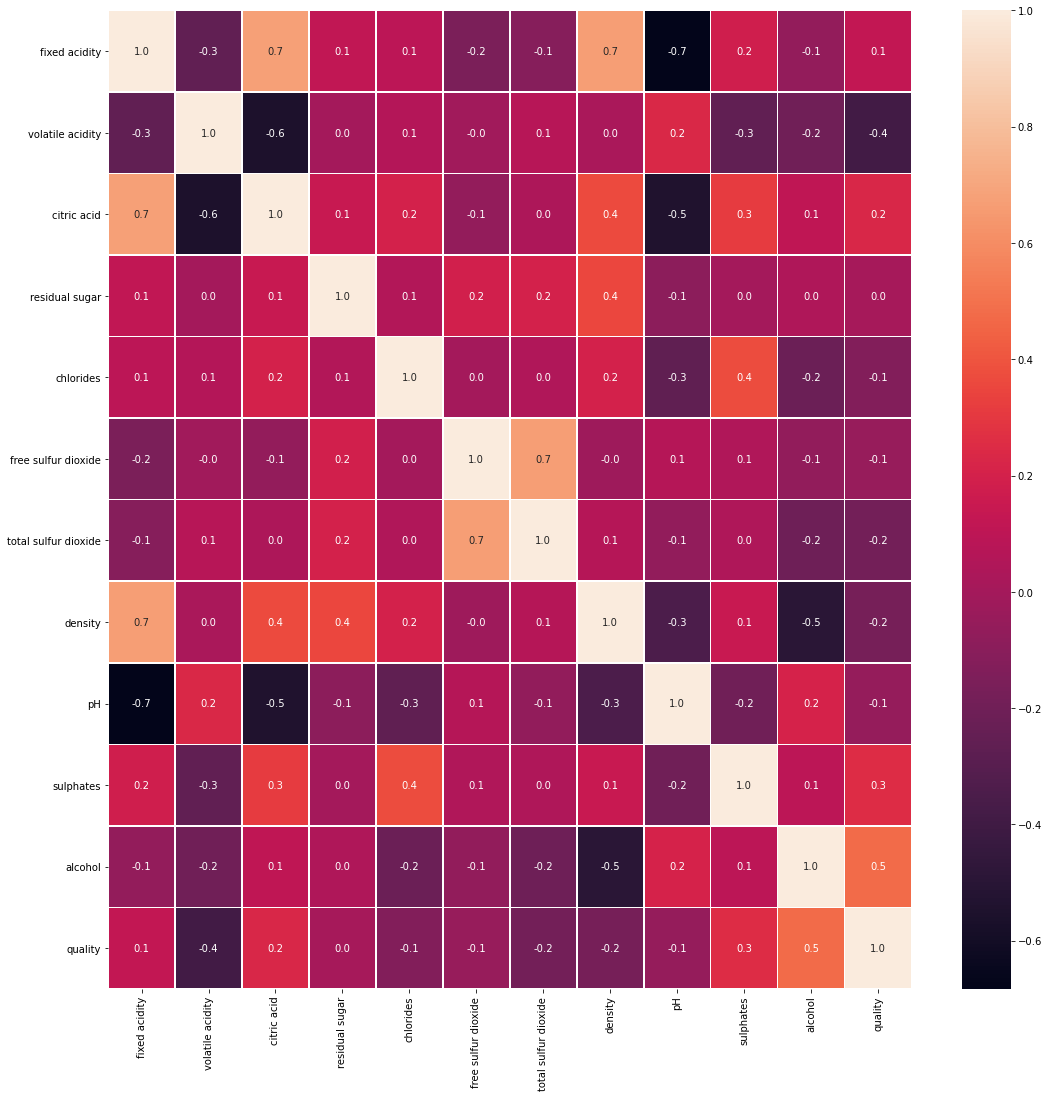

In [596]:
f,ax = plt.subplots(figsize=(18, 18))
sn.heatmap(wine.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [597]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [664]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.58,10.5,0
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.76,11.2,0
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.75,11.0,0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.71,10.2,0
1598,6.0,0.310,0.47,0.067,18.0,42.0,0.66,11.0,0


In [598]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [599]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

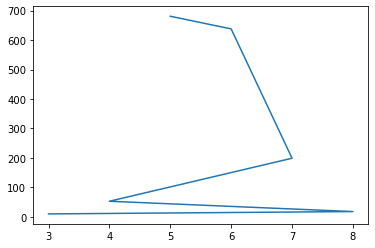

In [600]:
plt.plot(wine['quality'].value_counts())

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='quality'>

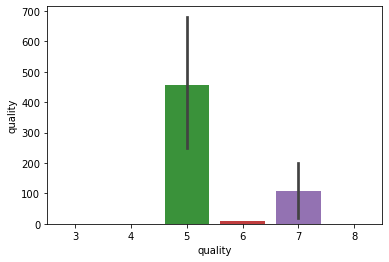

In [601]:
sn.barplot( wine['quality'], wine['quality'].value_counts(),)

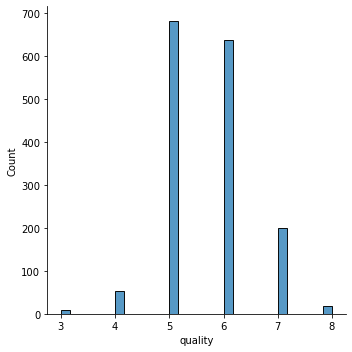

In [602]:
sn.displot(wine['quality'])

Text(0.5, 1.0, 'Number of wines for each quality category')

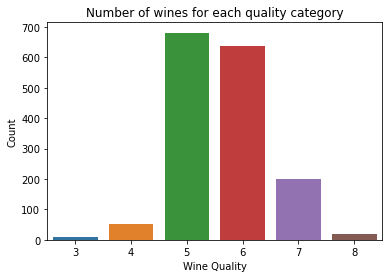

In [603]:
sn.barplot(x=wine['quality'].unique(), y=wine['quality'].value_counts())
plt.ylabel('Count')
plt.xlabel('Wine Quality')
plt.title('Number of wines for each quality category')

<AxesSubplot:xlabel='pH', ylabel='quality'>

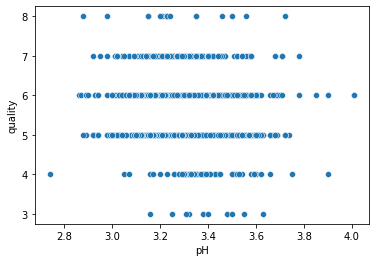

In [604]:
sn.scatterplot(x= wine['pH'], y = wine['quality'])

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

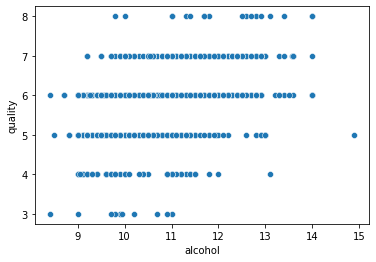

In [605]:
sn.scatterplot(x= wine['alcohol'], y = wine['quality'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

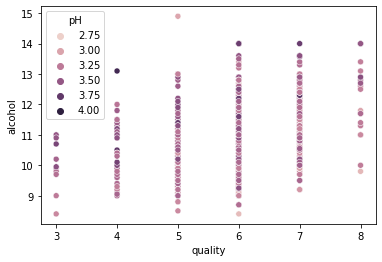

In [606]:
sn.scatterplot(x= wine['quality'], y = wine['alcohol'], hue = wine['pH'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

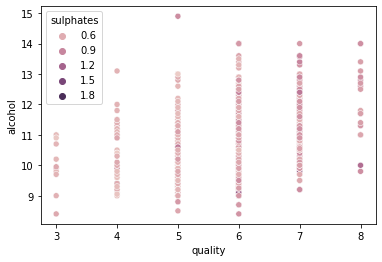

In [607]:
sn.scatterplot(x= wine['quality'], y = wine['alcohol'], hue = wine['sulphates'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

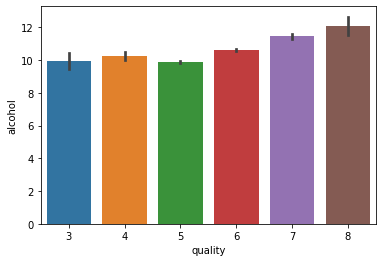

In [609]:
sn.barplot(x= wine['quality'], y = wine['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='pH'>

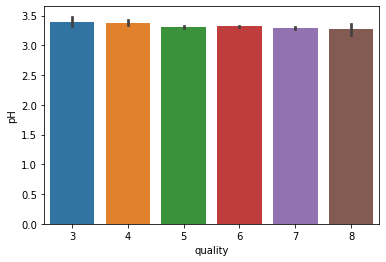

In [610]:
sn.barplot(x= wine['quality'], y = wine['pH'])

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

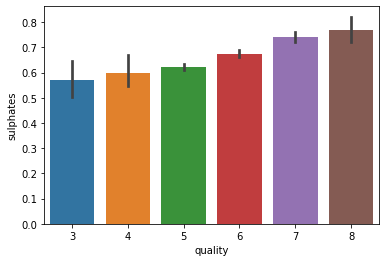

In [611]:
sn.barplot(x= wine['quality'], y = wine['sulphates'])

In [612]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

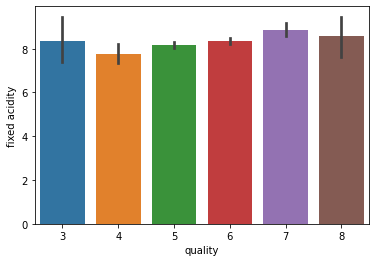

In [613]:
   sn.barplot(x= wine['quality'], y = wine['fixed acidity'])

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

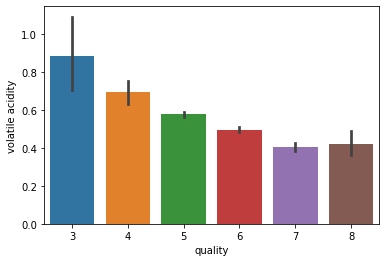

In [614]:
  sn.barplot(x= wine['quality'], y = wine['volatile acidity'])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

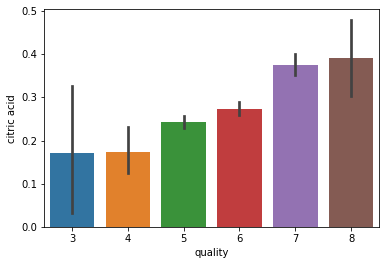

In [615]:
  sn.barplot(x= wine['quality'], y = wine['citric acid'])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

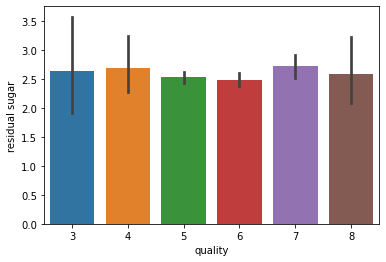

In [616]:
  sn.barplot(x= wine['quality'], y = wine['residual sugar'])

<AxesSubplot:xlabel='quality', ylabel='density'>

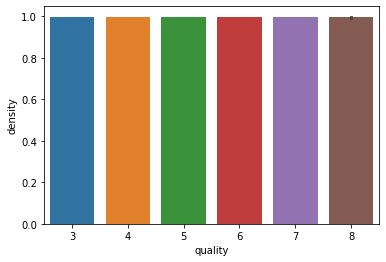

In [617]:
  sn.barplot(x= wine['quality'], y = wine['density'])

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

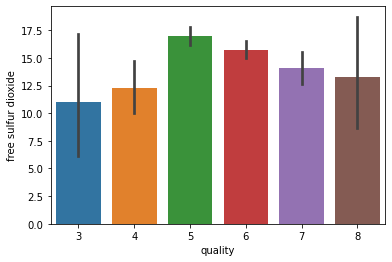

In [618]:
  sn.barplot(x= wine['quality'], y = wine['free sulfur dioxide'])

From the above infrence it is clear that pH, density, residual sugar, fixed acidity does not effect the quality of wine

# Preprocessing the data 

Making binary classificaion for the response variable.
Dividing wine as good and bad by giving the limit for the quality

In [619]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Assigning good and bad to quality of wine

bad: quality < 6

good: quality > 6

In [620]:
bins = (2, 6.0, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [621]:
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [622]:
wine.drop('pH', axis=1, inplace = True)
wine.drop('density', axis=1, inplace = True)
wine.drop('residual sugar', axis=1, inplace = True)


In [623]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   chlorides             1599 non-null   float64 
 4   free sulfur dioxide   1599 non-null   float64 
 5   total sulfur dioxide  1599 non-null   float64 
 6   sulphates             1599 non-null   float64 
 7   alcohol               1599 non-null   float64 
 8   quality               1599 non-null   category
dtypes: category(1), float64(8)
memory usage: 101.7 KB


assigning 0's and 1-s to quality

In [624]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [625]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [626]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

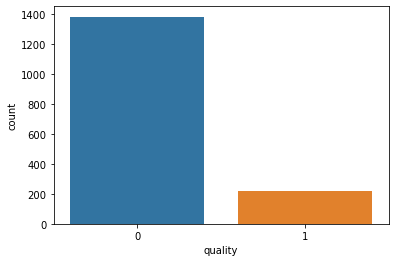

In [627]:
sn.countplot(wine['quality'])

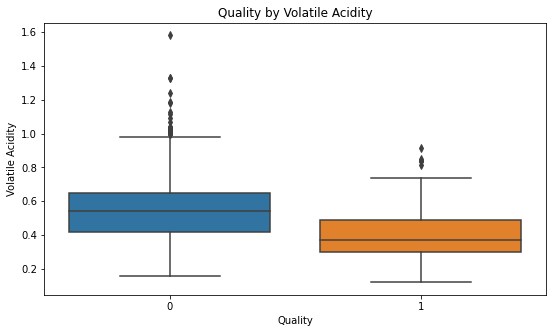

In [628]:
plt.figure(figsize=(9, 5))
sn.boxplot(x='quality',y='volatile acidity',data=wine, palette='tab10')
plt.title("Quality by Volatile Acidity")
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

Seperating the dataset as response variable and feature variabes

In [629]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

rain and Test splitting of data 

In [630]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

In [631]:
y_test

1147    1
659     0
871     0
1333    0
1411    0
       ..
72      0
754     0
1059    1
1400    0
1330    0
Name: quality, Length: 480, dtype: int32

In [632]:
y_train

417     0
729     0
741     0
1526    0
960     0
       ..
919     0
1164    0
500     0
941     1
421     1
Name: quality, Length: 1119, dtype: int32

Applying Standard scaling to get optimized result

In [633]:
sc = StandardScaler()

In [634]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [635]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1119, 8) (1119,)
Test set: (480, 8) (480,)


# Training and testing data is ready now to perform SVC

# Support Vector Classifier:

SVMs use kernels to transform the original data into a new space. Some of the most widely used kernels are: linear, polynomials, RBF (Radial Based Function) and sigmoid.

# Running SVM with default hyperparameter

In [636]:
#construct a dict to store accuracies of different each model
svm_acc = {}

In [637]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [638]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       416
           1       0.79      0.23      0.36        64

    accuracy                           0.89       480
   macro avg       0.84      0.61      0.65       480
weighted avg       0.88      0.89      0.86       480



In [639]:
print(confusion_matrix(y_test, pred_svc))

[[412   4]
 [ 49  15]]


In [640]:
from sklearn import metrics
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred)*100,"%")

Accuracy Score:
88.95833333333333 %


<AxesSubplot:>

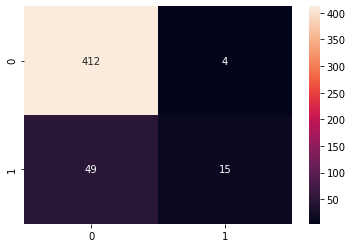

In [641]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_svc)
sn.heatmap(cm,annot=True,fmt='1.0f')

# Linear Kernel

In [642]:
from sklearn import metrics
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred)*100,"%")
svm_acc['svm with Linear kernel'] = metrics.accuracy_score(y_test,y_pred)*100,"%"

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       416
           1       0.00      0.00      0.00        64

    accuracy                           0.87       480
   macro avg       0.43      0.50      0.46       480
weighted avg       0.75      0.87      0.80       480

[[416   0]
 [ 64   0]]
Accuracy Score:
86.66666666666667 %


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

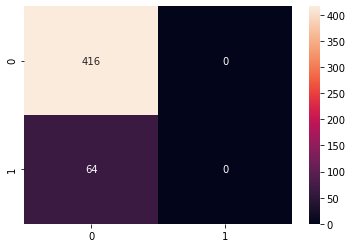

In [643]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_svc)
sn.heatmap(cm,annot=True,fmt='1.0f')

# RBF Kernel

In [645]:
from sklearn import metrics
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred)*100,"%")
svm_acc['svm with RBF kernel'] = metrics.accuracy_score(y_test,y_pred)*100,"%"

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       416
           1       0.79      0.23      0.36        64

    accuracy                           0.89       480
   macro avg       0.84      0.61      0.65       480
weighted avg       0.88      0.89      0.86       480

[[412   4]
 [ 49  15]]
Accuracy Score:
88.95833333333333 %


<AxesSubplot:>

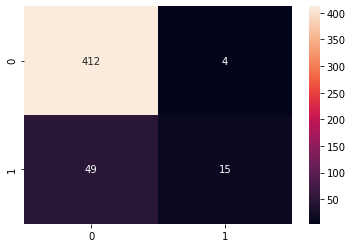

In [646]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_svc)
sn.heatmap(cm,annot=True,fmt='1.0f')

We can conclude from above that svm by default uses rbf kernel as a parameter for kernel

# Polynomial kernel

In [647]:
from sklearn import metrics
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred)*100,"%")
svm_acc['svm with Polynomial kernel'] = metrics.accuracy_score(y_test,y_pred)*100,"%"

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       416
           1       0.64      0.25      0.36        64

    accuracy                           0.88       480
   macro avg       0.77      0.61      0.65       480
weighted avg       0.86      0.88      0.86       480

[[407   9]
 [ 48  16]]
Accuracy Score:
88.125 %


<AxesSubplot:>

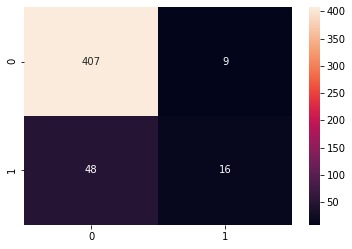

In [648]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_svc)
sn.heatmap(cm,annot=True,fmt='1.0f')

# Sigmoid Kernel

In [649]:
from sklearn import metrics
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred)*100,"%")
svm_acc['svm with Sigmoid kernel'] = metrics.accuracy_score(y_test,y_pred)*100,"%"

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       416
           1       0.64      0.25      0.36        64

    accuracy                           0.88       480
   macro avg       0.77      0.61      0.65       480
weighted avg       0.86      0.88      0.86       480

[[407   9]
 [ 48  16]]
Accuracy Score:
88.125 %


<AxesSubplot:>

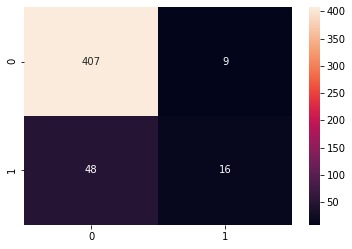

In [650]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_svc)
sn.heatmap(cm,annot=True,fmt='1.0f')

In [651]:
#transform dict svm_acc to a dataframe
acc_svm_df = pd.DataFrame(svm_acc.items(), columns=['kernel', 'acc_score'])
acc_svm_df.head()

,kernel,acc_score
0,svm with Linear kernel,"(86.66666666666667, %)"
1,svm with RBF kernel,"(88.95833333333333, %)"
2,svm with Polynomial kernel,"(88.125, %)"
3,svm with Sigmoid kernel,"(88.125, %)"


# Improving the accuracy of models

# Grid Search CV

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

In [ ]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

In [652]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  1.2, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))
print(metrics.accuracy_score(y_test,pred_svc2)*100,"%")

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       416
           1       0.71      0.34      0.46        64

    accuracy                           0.89       480
   macro avg       0.81      0.66      0.70       480
weighted avg       0.88      0.89      0.88       480

89.375 %


# Extra

# RandomForest Classifier

In [658]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [662]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = metrics.accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100,"%")

[[407   9]
 [ 33  31]]
91.25 %


<AxesSubplot:>

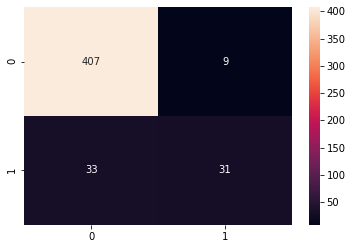

In [663]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rf_predict)
sn.heatmap(cm,annot=True,fmt='1.0f')